In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
xls = pd.ExcelFile('cust_journey/fininfo.xlsx')

### Reading sheet 1

In [3]:
sheet1 = xls.parse(0)
sheet1.head(20)

,Building,Month,Year,Category,Tenant,Unit,Cat_Sales,Tenant_Sales,CAT_Groc,Tenant_Groc,Cat_Sales_PSF,Tenant_Sales_psf,Cat_GLA,Tenant_GLA
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,51,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,49,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",46,1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,53,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565
4,Yorkdale Shopping Centre,11,2017,Electronics,EB Games,0181E,16325073.58,303262.59,7.82,17.10,478.7832,276.6994,34097,1096
5,Yorkdale Shopping Centre,11,2017,Electronics,Rogers,322,16325073.58,57934.00,7.82,159.68,478.7832,50.8192,34097,1140
6,Yorkdale Shopping Centre,11,2017,Electronics,Rogers,322,16325073.58,57934.00,7.82,159.68,478.7832,50.8192,34097,1140
7,Yorkdale Shopping Centre,11,2017,Electronics,Apple,308,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079
8,Yorkdale Shopping Centre,11,2017,Electronics,Koodo,0188E,16325073.58,35744.82,7.82,107.62,478.7832,35.7448,34097,1000
9,Yorkdale Shopping Centre,11,2017,Electronics,WirelessWave,0183E,16325073.58,321702.24,7.82,15.91,478.7832,265.4308,34097,1212


In [45]:
import pickle
# only needs to be run once
with open('fininfo.pickle', 'wb', -1) as handle:
    pickle.dump(sheet1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [46]:
sheet1 = pd.read_pickle('./fininfo.pickle')
print(sheet1.head())

                         Building  Month  Year  \
0  Yorkdale Shopping Centre           11  2017   
1  Yorkdale Shopping Centre           11  2017   
2  Yorkdale Shopping Centre           11  2017   
3  Yorkdale Shopping Centre           11  2017   
4  Yorkdale Shopping Centre           11  2017   

                         Category                Tenant      Unit  \
0  Children & Infants Apparel                  Gap Kids        51   
1  Children & Infants Apparel                  Gymboree        49   
2  Children & Infants Apparel      Childrens Place, The        46   
3  Children & Infants Apparel          Kids Foot Locker        53   
4  Electronics                                 EB Games  0181E      

     Cat_Sales  Tenant_Sales  CAT_Groc  Tenant_Groc  Cat_Sales_PSF  \
0   1504219.33     653492.57     31.99        27.67        84.9217   
1   1504219.33     186516.43     31.99        29.38        84.9217   
2   1504219.33     296994.16     31.99        53.12        84.9217   
3   

In [47]:
allcats = sheet1.Category.unique().tolist()

In [48]:
allcats

['Children & Infants Apparel    ',
 'Electronics                   ',
 'Family Apparel                ',
 'Fashion Accessories           ',
 'Food Court                    ',
 'Footwear                      ',
 'Full-Service Restaurants      ',
 'Furniture & Home Furnishings  ',
 'General merch & variety stores',
 'Health & Beauty               ',
 'Jewellery                     ',
 'Large Format                  ',
 'Mens Apparel                  ',
 'Non Food-Court Fast Food      ',
 'Office supply,stationary,gifts',
 'Other Services                ',
 'Personal Care Services        ',
 'Recreation                    ',
 'Specialty Apparel             ',
 'Specialty Food Stores         ',
 'Specialty Leasing             ',
 'Womens Apparel                ']

In [49]:
fashion = ['Children & Infants Apparel    ',
 'Family Apparel                ',
 'Fashion Accessories           ',
 'Footwear                      ',
 'Health & Beauty               ',
 'Jewellery                     ',
 'Large Format                  ',
 'Mens Apparel                  ',
 'Specialty Apparel             ',
 'Womens Apparel                ']

In [50]:
sheet1['fashion'] = sheet1['Category'].isin(fashion)

In [51]:
sheet1.head()

,Building,Month,Year,Category,Tenant,Unit,Cat_Sales,Tenant_Sales,CAT_Groc,Tenant_Groc,Cat_Sales_PSF,Tenant_Sales_psf,Cat_GLA,Tenant_GLA,fashion
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,51,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685,True
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,49,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609,True
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",46,1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854,True
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,53,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565,True
4,Yorkdale Shopping Centre,11,2017,Electronics,EB Games,0181E,16325073.58,303262.59,7.82,17.10,478.7832,276.6994,34097,1096,False


In [52]:
fashion_spend = sheet1[sheet1['fashion']==True]

In [53]:
nonfashion_spend = sheet1[sheet1['fashion']==False]

In [54]:
fashion_spend['Tenant_Sales'].sum()

515636682.20999986

In [55]:
nonfashion_spend['Tenant_Sales'].sum()

86515282.39999999

In [31]:
sheet1.describe()
sheet1.columns

Index(['Building', 'Month', 'Year', 'Category', 'Tenant', 'Unit', 'Cat_Sales',
       'Tenant_Sales', 'CAT_Groc', 'Tenant_Groc', 'Cat_Sales_PSF',
       'Tenant_Sales_psf', 'Cat_GLA', 'Tenant_GLA', 'fashion'],
      dtype='object')

### analyzing data by category, by month

### Kids apparel first

In [32]:
nov = sheet1[ (sheet1.Month == 11)]
dec = sheet1[ (sheet1.Month == 12)]
kidslist = 'Children & Infants Apparel'
nov_dec = sheet1[ (sheet1.Month == 11) | (sheet1.Month == 12)]

In [33]:
nov_dec_kids = sheet1[sheet1['Category'].str.contains(kidslist)]
nov_dec_kids

,Building,Month,Year,Category,Tenant,Unit,Cat_Sales,Tenant_Sales,CAT_Groc,Tenant_Groc,Cat_Sales_PSF,Tenant_Sales_psf,Cat_GLA,Tenant_GLA,fashion
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,51,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685,True
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,49,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609,True
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",46,1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854,True
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,53,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565,True
254,Yorkdale Shopping Centre,12,2017,Children & Infants Apparel,Gap Kids,51,2082294.44,749711.50,32.74,28.65,117.5574,112.1483,17713,6685,True
255,Yorkdale Shopping Centre,12,2017,Children & Infants Apparel,Gymboree,49,2082294.44,197136.98,32.74,31.03,117.5574,122.5214,17713,1609,True
256,Yorkdale Shopping Centre,12,2017,Children & Infants Apparel,"Childrens Place, The",46,2082294.44,371654.00,32.74,52.42,117.5574,76.5665,17713,4854,True
257,Yorkdale Shopping Centre,12,2017,Children & Infants Apparel,Kids Foot Locker,53,2082294.44,763791.96,32.74,26.70,117.5574,167.3147,17713,4565,True


In [34]:
kids_nov = nov[nov['Category'].str.contains(kidslist)]
kids_dec = dec[dec['Category'].str.contains(kidslist)]

In [35]:
kids_dec.dtypes

Building             object
Month                 int64
Year                  int64
Category             object
Tenant               object
Unit                 object
Cat_Sales           float64
Tenant_Sales        float64
CAT_Groc            float64
Tenant_Groc         float64
Cat_Sales_PSF       float64
Tenant_Sales_psf    float64
Cat_GLA               int64
Tenant_GLA            int64
fashion                bool
dtype: object

In [39]:
from matplotlib import rc
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = kids_nov['Tenant_Sales']
bars2 = kids_dec['Tenant_Sales']

# The position of the bars on the x-axis
# r = [0,1,2,3]

# Names of group and bar width
names = kids_nov['Tenant']
barWidth = 0.4
plt.figure(figsize=(8,8))
# Create brown bars and name them to be able to pass on a legend
one = plt.bar(rc, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones and name them as well
two = plt.bar(rc, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
plt.legend([one, two], ['Nov_Sales', 'Dec_Sales'])
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Tenant",fontweight='bold' )
plt.savefig('Nov_Dec Kids Apparel', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()


TypeError: unsupported operand type(s) for -: 'function' and 'float'

### Electronics

In [40]:
elec_list = 'Electronics'
# nov_dec = sheet1[ (sheet1.Month == 11) | (sheet1.Month == 12)]

In [41]:
nov_dec_elec = sheet1[sheet1['Category'].str.contains(elec_list)]
nov_dec_elec.describe()

,Month,Year,Cat_Sales,Tenant_Sales,CAT_Groc,Tenant_Groc,Cat_Sales_PSF,Tenant_Sales_psf,Cat_GLA,Tenant_GLA
count,30.000000,30.0,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,11.500000,2017.0,1.929631e+07,1.290459e+06,7.835000,50.472000,565.923950,299.018717,34097.0,2349.133333
std,0.508548,0.0,3.022031e+06,3.306295e+06,0.015256,56.143147,88.630443,315.983469,0.0,2588.524406
min,11.000000,2017.0,1.632507e+07,2.676101e+04,7.820000,2.760000,478.783200,35.744800,34097.0,434.000000
25%,11.000000,2017.0,1.632507e+07,1.347732e+05,7.820000,13.912500,478.783200,94.802475,34097.0,1107.000000
50%,11.500000,2017.0,1.929631e+07,3.124824e+05,7.835000,16.870000,565.923950,214.450950,34097.0,1224.000000
75%,12.000000,2017.0,2.226755e+07,5.634459e+05,7.850000,65.457500,653.064700,402.900400,34097.0,1823.250000
max,12.000000,2017.0,2.226755e+07,1.461388e+07,7.850000,186.240000,653.064700,1449.933000,34097.0,10079.000000


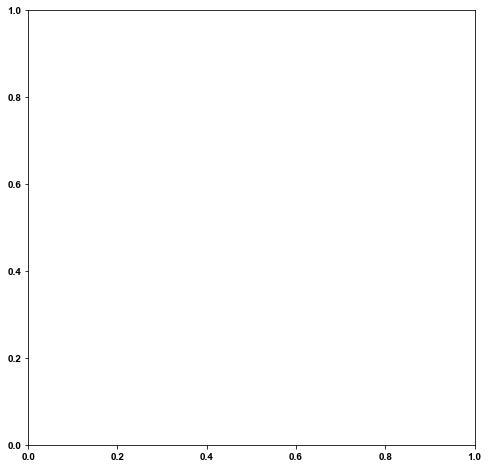

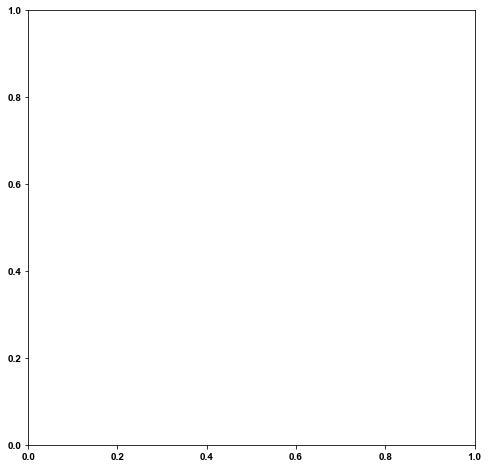

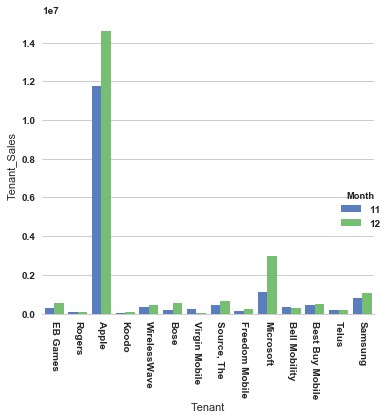

In [43]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Tenant", y="Tenant_Sales", hue="Month", data=nov_dec_elec,
                   size=6, kind="bar", palette="muted", aspect=.8)
g.despine(left=True)
g.set_xticklabels(rotation=-90)
g.set_ylabels("Tenant_Sales")
plt.tight_layout()
plt.savefig('Nov_Dec_Electronics', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

# Family Apparel

In [260]:
fam_list = 'Family Apparel'

In [300]:
nov_dec_fam = sheet1[sheet1['Category'].str.contains(fam_list)]
nov_dec_fam

,Building,Month,Year,Category,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
18,Yorkdale Shopping Centre,11,2017,Family Apparel,AllSaints,31582267.03,780444.24,19.53,29.17,197.4595,117.7140,159943,6630
19,Yorkdale Shopping Centre,11,2017,Family Apparel,American Eagle Outfitters,31582267.03,576842.68,19.53,25.03,197.4595,92.9042,159943,6209
20,Yorkdale Shopping Centre,11,2017,Family Apparel,Arc teryx,31582267.03,346039.00,19.53,25.74,197.4595,123.4971,159943,2802
21,Yorkdale Shopping Centre,11,2017,Family Apparel,Armani Exchange A | X,31582267.03,187634.21,19.53,62.43,197.4595,48.8376,159943,3842
22,Yorkdale Shopping Centre,11,2017,Family Apparel,Banana Republic,31582267.03,1347666.56,19.53,25.89,197.4595,95.5182,159943,14109
23,Yorkdale Shopping Centre,11,2017,Family Apparel,Bench,31582267.03,128431.35,19.53,41.36,197.4595,67.2415,159943,1910
24,Yorkdale Shopping Centre,11,2017,Family Apparel,Burberry,31582267.03,1819692.63,19.53,10.88,197.4595,313.2540,159943,5809
25,Yorkdale Shopping Centre,11,2017,Family Apparel,Canada Goose,31582267.03,8671938.00,19.53,7.19,197.4595,1920.2697,159943,4516
26,Yorkdale Shopping Centre,11,2017,Family Apparel,Cos,31582267.03,461653.00,19.53,21.18,197.4595,66.8965,159943,6901
27,Yorkdale Shopping Centre,11,2017,Family Apparel,Diesel,31582267.03,246856.79,19.53,34.77,197.4595,82.2855,159943,3000


In [333]:
testdf = sheet1.groupby(['Month','Tenant'])[['Lease_Sales']].sum().reset_index()
testdf

,Month,Tenant,Lease_Sales
0,11,A & W,193734.83
1,11,Aldo,628042.67
2,11,Aldo Accessories,129977.34
3,11,Alex and Ani,117753.02
4,11,AllSaints,780444.24
5,11,Amaya,119000.00
6,11,American Eagle Outfitters,576842.68
7,11,Ann Taylor,287768.39
8,11,Anthropologie,425270.30
9,11,Apple,11782680.00


In [334]:
testdf.set_index('Lease_Sales', inplace=True)

In [336]:
testdf.sort_index(ascending=True, inplace=True)

In [344]:
newone= testdf.reset_index()
newone2 = newone[350:]

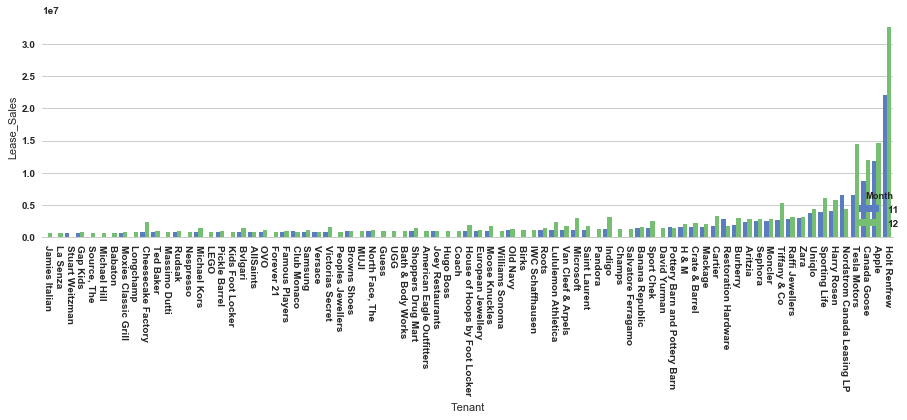

In [345]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Tenant", y="Lease_Sales", hue="Month", data=newone2,
                   size=6, kind="bar", palette="muted", aspect=2)
g.despine(left=True)
g.set_xticklabels(rotation=-90)
g.set_ylabels("Lease_Sales")
plt.tight_layout()
plt.savefig('Nov_Dec_Fam_Apparel-TEST TEST', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

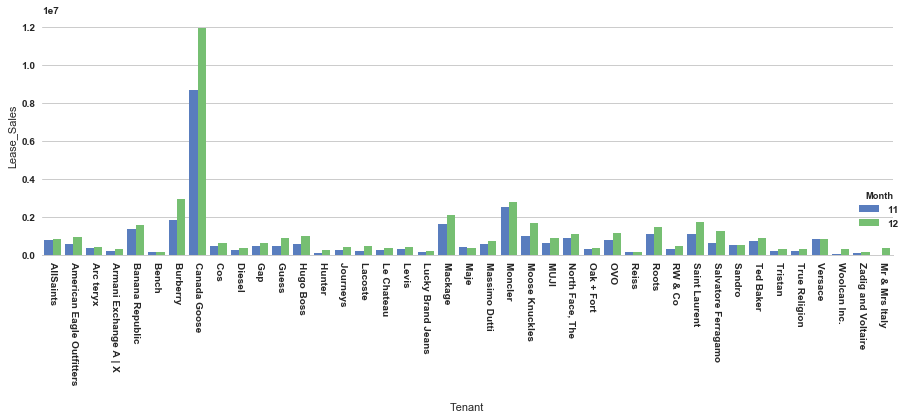

In [295]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Tenant", y="Lease_Sales", hue="Month", data=nov_dec_fam,
                   size=6, kind="bar", palette="muted", aspect=2)
g.despine(left=True)
g.set_xticklabels(rotation=-90)
g.set_ylabels("Lease_Sales")
plt.tight_layout()
plt.savefig('Nov_Dec_Fam_Apparel', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()

In [277]:
fam_nov = nov[nov['Category'].str.contains(fam_list)]
fam_dec = dec[dec['Category'].str.contains(fam_list)]

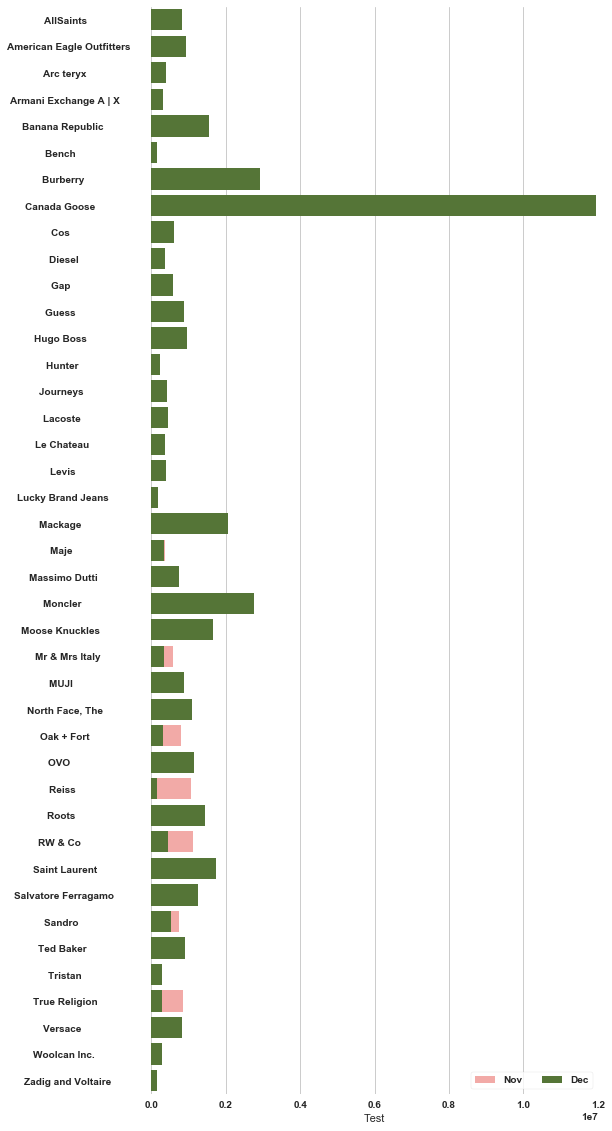

In [294]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 20))
sns.set_color_codes("pastel")
one = sns.barplot(x="Lease_Sales", y="Tenant", data=fam_nov,
            label="Nov", color="r")
sns.set_color_codes("muted")
two = sns.barplot(x="Lease_Sales", y="Tenant", data=fam_dec,
            label="Dec", color="#557f2d")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 12000000), ylabel="",
       xlabel="Test")
sns.despine(left=True, bottom=True)
plt.show()